# 파이썬 활용 디지털마케팅 데이터분석 및 기획

# Today's mission

- 예측 모델링 개요  
- 문제 정의 및 가설 설정  
  (가설 및 목적, 예상 결과)
- 분석 프레임  
  (모델링 프로세스, 로직 트리)
- 데이터 불러오기  
  (파일 읽기, 컬럼 정보, 색인)
- 데이터 전처리 및 분석  
  (결측치 처리, 이상치 처리, 분포 변환, 단위 변환, 전처리 실습)
- 모델 생성 및 모델 평가  
  (모델 구축 프로세스, Cross Validation, Grid Search, 평가 메트릭)
- 모델 성능 개선 및 결과 토론  
  (변수 스케일링 및 분포 변환, Feasure Selection, Model Selection)

]

## Day04-3A 예측 모델링 (실습) - 데이터 전처리

- 데이터 전처리 및 분석  
  (결측치 처리, 이상치 처리, 분포 변환, 단위 변환, 전처리 실습)

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.max_rows = 5
np.set_printoptions(precision=3)

import warnings
warnings.filterwarnings('ignore')
plt.style.use('seaborn-v0_8-paper')

**목차**
1. Read the dataset (after extracting)
2. Preprocessing
3. EDA
4. Modeling
5. Evaluation

### 파일 읽기

In [2]:
df = pd.read_csv("data/testset2.csv", index_col=0)
df

,group,viewCount,editCount,shareCount,searchCount,coworkCount,add,del,move,rename,adddir,movedir,visdays,openCount,saveCount,exportCount,viewTraffic,editTraffic,exportTraffic,traffic
iduser,,,,,,,,,,,,,,,,,,,,
10100018739106,sdu,12.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,6.0,12.0,0.0,0.0,3504812.0,0.0,0.0,3504812.0
10100037810674,sdu,23.0,0.0,0.0,1.0,0.0,13.0,0.0,0.0,0.0,0.0,0.0,8.0,23.0,0.0,0.0,17123098.0,0.0,0.0,17123098.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10100022150627,sdu,18.0,0.0,0.0,0.0,0.0,20.0,0.0,0.0,0.0,0.0,0.0,9.0,18.0,0.0,0.0,53352144.0,0.0,0.0,53352144.0
10100021804275,sdu,3.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,3.0,3.0,0.0,0.0,95232.0,0.0,0.0,95232.0


### 결측치 처리

- 추후에는 협의를 통해 결측치 발새 이유 파악 및 예방에 노력을 기울이는 것이 필요
- 결측치 처리 방법
    - 가장 쉬운 방법은 Null이 포함 행을 모두 제거하는 것이다
    - 사례(observation)이 많다면 이 방법을 사용하는 것이 가능하다
    - 평균, 중앙치, 최빈치, 간단한 예측 모델활용해서 imputation

    - 만약 샘플수가 충분하지 않을 경우, Pandas의 fillna() 명령어로 Null 값을 채우는 것이 가능하다. 
    - 연속형인 경우 Mean이나 Median을 이용하고 명목형인 경우 Mode(최빈치)나 classification 모델을 통해 Null 값을 대체할 수 있다.

```python
# Null 값을 median, mean으로 대체하는 코드 예제
df.fillna(df.med())
df.fillna(df.mean()) 

# Scikit-learn Imputation을 이용하여 명목변수의 Null 값을 Mode로 대체한 예제
from sklearn.preprocessing import Imputer
imp = Imputer(missing_values = 'NaN', strategy='most_frequent', axis=0)
df['X'] = imp.fit_transform(df['X'])

# 참고: http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.Imputer.html
```

In [3]:
# 우선 group 컬럼이 null 경우만 선택
df[df['group'].isnull() == True].head(10)

,group,viewCount,editCount,shareCount,searchCount,coworkCount,add,del,move,rename,adddir,movedir,visdays,openCount,saveCount,exportCount,viewTraffic,editTraffic,exportTraffic,traffic
iduser,,,,,,,,,,,,,,,,,,,,


In [4]:
# visdays 컬럼이 null 경우만 선택
df[df['visdays'].isnull() == True].head(10)

,group,viewCount,editCount,shareCount,searchCount,coworkCount,add,del,move,rename,adddir,movedir,visdays,openCount,saveCount,exportCount,viewTraffic,editTraffic,exportTraffic,traffic
iduser,,,,,,,,,,,,,,,,,,,,
10100022918449,sdu,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10100009612042,sdu,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10100038688226,sdu,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10100014174432,sdu,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# 특정 열을 기준으로 dropna
df1 = df.dropna(subset=['visdays'])

In [6]:
df1.head(10)

,group,viewCount,editCount,shareCount,searchCount,coworkCount,add,del,move,rename,adddir,movedir,visdays,openCount,saveCount,exportCount,viewTraffic,editTraffic,exportTraffic,traffic
iduser,,,,,,,,,,,,,,,,,,,,
10100018739106,sdu,12.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,6.0,12.0,0.0,0.0,3504812.0,0.0,0.0,3504812.0
10100037810674,sdu,23.0,0.0,0.0,1.0,0.0,13.0,0.0,0.0,0.0,0.0,0.0,8.0,23.0,0.0,0.0,17123098.0,0.0,0.0,17123098.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10100039037854,sdu,4.0,0.0,0.0,4.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,15.0,4.0,0.0,0.0,191940.0,0.0,0.0,191940.0
10100038701419,mdu,27.0,34.0,0.0,2.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,26.0,27.0,35.0,0.0,4229688.0,208649.0,0.0,4438337.0


In [7]:
df1.isnull().sum()

group                0
viewCount        22534
                 ...  
exportTraffic    38403
traffic          38403
Length: 20, dtype: int64

Q) visiday, group 을 제외한 나머지 항목이 nan이면 drop 해볼까요?

In [8]:
# subset 용 컬럼 설정
mycols = df1.columns[1:].drop('visdays')

# mycols 컬럼들을 기준으로 drop
df2 = df1.dropna(subset=mycols, how='all')

In [9]:
df2.head(10)

,group,viewCount,editCount,shareCount,searchCount,coworkCount,add,del,move,rename,adddir,movedir,visdays,openCount,saveCount,exportCount,viewTraffic,editTraffic,exportTraffic,traffic
iduser,,,,,,,,,,,,,,,,,,,,
10100018739106,sdu,12.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,6.0,12.0,0.0,0.0,3504812.0,0.0,0.0,3504812.0
10100037810674,sdu,23.0,0.0,0.0,1.0,0.0,13.0,0.0,0.0,0.0,0.0,0.0,8.0,23.0,0.0,0.0,17123098.0,0.0,0.0,17123098.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10100034746743,sdu,5.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,3.0,5.0,0.0,0.0,675527.0,0.0,0.0,675527.0
10100016781863,sdu,18.0,0.0,0.0,0.0,0.0,13.0,0.0,0.0,0.0,0.0,0.0,8.0,18.0,0.0,0.0,20468009.0,0.0,0.0,20468009.0


In [10]:
df2.isnull().sum()

group                0
viewCount         1580
                 ...  
exportTraffic    17449
traffic          17449
Length: 20, dtype: int64

In [11]:
df2[df2['viewCount'].isnull() == True][:10]

,group,viewCount,editCount,shareCount,searchCount,coworkCount,add,del,move,rename,adddir,movedir,visdays,openCount,saveCount,exportCount,viewTraffic,editTraffic,exportTraffic,traffic
iduser,,,,,,,,,,,,,,,,,,,,
10100028912459,sdu,NaN,NaN,NaN,NaN,NaN,22.0,0.0,0.0,0.0,2.0,0.0,18.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10100022395852,sdu,NaN,NaN,NaN,NaN,NaN,13.0,0.0,0.0,0.0,0.0,0.0,16.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10100008244902,sdu,NaN,NaN,NaN,NaN,NaN,27.0,0.0,0.0,0.0,0.0,0.0,12.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10100019342545,sdu,NaN,NaN,NaN,NaN,NaN,88.0,0.0,1.0,0.0,1.0,0.0,30.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
df2[df2['add'].isnull() == True][:10]

,group,viewCount,editCount,shareCount,searchCount,coworkCount,add,del,move,rename,adddir,movedir,visdays,openCount,saveCount,exportCount,viewTraffic,editTraffic,exportTraffic,traffic
iduser,,,,,,,,,,,,,,,,,,,,
10100018739106,sdu,12.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,6.0,12.0,0.0,0.0,3504812.0,0.0,0.0,3504812.0
10100036273719,sdu,4.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,4.0,4.0,0.0,0.0,2234363.0,0.0,0.0,2234363.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10100038316936,mdu,13.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,28.0,13.0,0.0,0.0,60650731.0,0.0,0.0,60650731.0
10100017870216,sdu,11.0,0.0,1.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,5.0,11.0,1.0,0.0,6394.0,393.0,0.0,6787.0


In [13]:
df2[df2['openCount'].isnull() == True][:10]

,group,viewCount,editCount,shareCount,searchCount,coworkCount,add,del,move,rename,adddir,movedir,visdays,openCount,saveCount,exportCount,viewTraffic,editTraffic,exportTraffic,traffic
iduser,,,,,,,,,,,,,,,,,,,,
10100026531335,sdu,18.0,0.0,0.0,0.0,0.0,15.0,0.0,0.0,0.0,0.0,0.0,14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10100036725270,sdu,50.0,0.0,0.0,0.0,0.0,14.0,0.0,0.0,0.0,0.0,0.0,23.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10100027655619,sdu,13.0,0.0,0.0,0.0,0.0,13.0,0.0,0.0,0.0,0.0,0.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10100031368883,sdu,109.0,0.0,0.0,0.0,0.0,33.0,0.0,0.0,0.0,0.0,0.0,16.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
df2[df2['traffic'].isnull() == True][:10]

,group,viewCount,editCount,shareCount,searchCount,coworkCount,add,del,move,rename,adddir,movedir,visdays,openCount,saveCount,exportCount,viewTraffic,editTraffic,exportTraffic,traffic
iduser,,,,,,,,,,,,,,,,,,,,
10100026531335,sdu,18.0,0.0,0.0,0.0,0.0,15.0,0.0,0.0,0.0,0.0,0.0,14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10100036725270,sdu,50.0,0.0,0.0,0.0,0.0,14.0,0.0,0.0,0.0,0.0,0.0,23.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10100027655619,sdu,13.0,0.0,0.0,0.0,0.0,13.0,0.0,0.0,0.0,0.0,0.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10100031368883,sdu,109.0,0.0,0.0,0.0,0.0,33.0,0.0,0.0,0.0,0.0,0.0,16.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**add, del ~ movedir 까지는 파일 management 관련 변수이므로 상대적 중요도 낮음**
- 변수 삭제를 고려해볼 수 있으나 우선 pass
- 우선 메꾸고 추후 제거도 고려 가능

In [15]:
# zero로 imputaion
df2 = df2.fillna(0)

In [16]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 163352 entries, 10100018739106 to 10100021804275
Data columns (total 20 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   group          163352 non-null  object 
 1   viewCount      163352 non-null  float64
 2   editCount      163352 non-null  float64
 3   shareCount     163352 non-null  float64
 4   searchCount    163352 non-null  float64
 5   coworkCount    163352 non-null  float64
 6   add            163352 non-null  float64
 7   del            163352 non-null  float64
 8   move           163352 non-null  float64
 9   rename         163352 non-null  float64
 10  adddir         163352 non-null  float64
 11  movedir        163352 non-null  float64
 12  visdays        163352 non-null  float64
 13  openCount      163352 non-null  float64
 14  saveCount      163352 non-null  float64
 15  exportCount    163352 non-null  float64
 16  viewTraffic    163352 non-null  float64
 17  editTraffic  

In [17]:
df2.head()

,group,viewCount,editCount,shareCount,searchCount,coworkCount,add,del,move,rename,adddir,movedir,visdays,openCount,saveCount,exportCount,viewTraffic,editTraffic,exportTraffic,traffic
iduser,,,,,,,,,,,,,,,,,,,,
10100018739106,sdu,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,12.0,0.0,0.0,3504812.0,0.0,0.0,3504812.0
10100037810674,sdu,23.0,0.0,0.0,1.0,0.0,13.0,0.0,0.0,0.0,0.0,0.0,8.0,23.0,0.0,0.0,17123098.0,0.0,0.0,17123098.0
10100036273719,sdu,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,4.0,0.0,0.0,2234363.0,0.0,0.0,2234363.0
10100027752244,sdu,6.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,6.0,2.0,0.0,602361.0,210114.0,0.0,812475.0
10100006151000,sdu,33.0,0.0,0.0,0.0,0.0,16.0,0.0,0.0,0.0,0.0,0.0,18.0,33.0,0.0,0.0,4307703.0,0.0,0.0,4307703.0


In [18]:
# 간략한 기술 통계 확인
df2.describe()

,viewCount,editCount,shareCount,searchCount,coworkCount,add,del,move,rename,adddir,movedir,visdays,openCount,saveCount,exportCount,viewTraffic,editTraffic,exportTraffic,traffic
count,163352.000000,163352.000000,163352.000000,163352.000000,163352.000000,163352.000000,163352.00000,163352.00000,163352.00000,163352.000000,163352.000000,163352.000000,163352.000000,163352.000000,163352.000000,1.633520e+05,1.633520e+05,1.633520e+05,1.633520e+05
mean,24.794034,1.590394,0.075965,1.020955,0.003147,12.167767,0.00314,0.04704,0.41361,0.152536,0.002381,10.020043,22.205072,2.459572,0.007897,2.318484e+07,6.540148e+05,3.580391e+03,2.384243e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75%,30.000000,0.000000,0.000000,0.000000,0.000000,15.000000,0.00000,0.00000,0.00000,0.000000,0.000000,14.000000,27.000000,0.000000,0.000000,1.740115e+07,7.454000e+03,0.000000e+00,1.805862e+07
max,3005.000000,5267.000000,78.000000,893.000000,63.000000,17755.000000,28.00000,127.00000,8248.00000,355.000000,32.000000,31.000000,3005.000000,1432.000000,54.000000,2.826016e+10,1.233858e+09,1.199935e+08,2.826016e+10


### Missing Value 처리 가이드

- Missing Value 파악을 위해 `df.info()` 가장 처음에 이용
- 만약 np.nan으로 적절히 missing value로 불러왔다면 info() 이용 가능하지만,
- '', ' ' 이런식의 공백이나 다른 방식(.)으로 처리되어 있다면, 모두 repalce 처리해야함
- `df.info()`를 실행했을 때, 누가봐도 float or int 인데 object(string)으로 되어 있다면 이런 사레가 포함될 가능성 높음

In [19]:
# 가짜 dataframe 생성
tt = df2[['group', 'viewCount']]

tt.head()

,group,viewCount
iduser,,
10100018739106,sdu,12.0
10100037810674,sdu,23.0
10100036273719,sdu,4.0
10100027752244,sdu,6.0
10100006151000,sdu,33.0


In [20]:
tt.info()

<class 'pandas.core.frame.DataFrame'>
Index: 163352 entries, 10100018739106 to 10100021804275
Data columns (total 2 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   group      163352 non-null  object 
 1   viewCount  163352 non-null  float64
dtypes: float64(1), object(1)
memory usage: 3.7+ MB


In [21]:
# np.nan 대신 ''로 수집된 경우
# tt.loc[10100037810674,'viewCount'] == ''
# tt.loc[10100036273719,'viewCount'] = ''

# np.nan 대신 '.'로 수집된 경우
# tt.loc[10100034746743,'group'] = '. '
# tt.loc[10100016781863,'group'] = '. '

# if missing is zero.......?

In [22]:
tt.head(10)

,group,viewCount
iduser,,
10100018739106,sdu,12.0
10100037810674,sdu,23.0
...,...,...
10100034746743,sdu,5.0
10100016781863,sdu,18.0


In [23]:
tt.info() # if continous var such as viewcount is object object?

<class 'pandas.core.frame.DataFrame'>
Index: 163352 entries, 10100018739106 to 10100021804275
Data columns (total 2 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   group      163352 non-null  object 
 1   viewCount  163352 non-null  float64
dtypes: float64(1), object(1)
memory usage: 3.7+ MB


In [24]:
# 만약 큰 데이터셋에서는 찾는 경우는 정렬을 이용
tt.sort_values("viewCount", ascending=False)#.head(10)

,group,viewCount
iduser,,
10100004393355,sdu,3005.0
10100028865215,sdu,2373.0
...,...,...
10100036950546,sdu,0.0
10100010579034,sdu,0.0


In [25]:
tt.query("viewCount == ''")

,group,viewCount
iduser,,


In [26]:
tt.sort_values("group", ascending=True).head(10)

,group,viewCount
iduser,,
10100014545377,mdu,74.0
10100019889646,mdu,10.0
...,...,...
10100000064438,mdu,3.0
10100002786618,mdu,27.0


In [27]:
tt.query("group == '.'")

,group,viewCount
iduser,,


In [28]:
# 공백 제거
tt['group'] = tt['group'].str.strip()

In [29]:
tt.query("group == '.'")

,group,viewCount
iduser,,


In [30]:
# 만약 변수에 공백이 있을 경우
tt.columns = ['group ', ' viewCount']

In [31]:
tt.head()

,group,viewCount
iduser,,
10100018739106,sdu,12.0
10100037810674,sdu,23.0
10100036273719,sdu,4.0
10100027752244,sdu,6.0
10100006151000,sdu,33.0


In [32]:
# strip 함수 이용
tt.columns = tt.columns.str.strip()

In [33]:
# if no float, replace with np.nan
for i in tt.index:
    if type(tt.loc[i, 'viewCount']) == float:
        tt.loc[i, 'viewCount'] == tt.loc[i, 'viewCount']    
    else:
        tt.loc[i, 'viewCount'] = np.nan

In [34]:
tt.head()

,group,viewCount
iduser,,
10100018739106,sdu,NaN
10100037810674,sdu,NaN
10100036273719,sdu,NaN
10100027752244,sdu,NaN
10100006151000,sdu,NaN


In [35]:
# replace 이용 방식 (단 에러 값을 정확히 알고 있어야 함)
tt['group'] = tt['group'].replace('.', np.nan)

In [36]:
tt.head(10)

,group,viewCount
iduser,,
10100018739106,sdu,NaN
10100037810674,sdu,NaN
...,...,...
10100034746743,sdu,NaN
10100016781863,sdu,NaN


In [37]:
tt.isnull().sum()

group             0
viewCount    163352
dtype: int64

In [38]:
# fill null with mean
tt['viewCount'] = tt['viewCount'].fillna(tt.viewCount.mean())

# fill null with mode
tt['group'] = tt['group'].fillna(tt.group.value_counts().index[0])

In [39]:
tt.head(10)

,group,viewCount
iduser,,
10100018739106,sdu,NaN
10100037810674,sdu,NaN
...,...,...
10100034746743,sdu,NaN
10100016781863,sdu,NaN


### 결측치를 처리할 때 고려할 점
- 결측치를 처리할 경우에도 도메인 지식은 유용하게 사용된다.
- 인적, 기계적 원인임이 판명되면, 협업자와 지속적으로 노력해 결측치를 **사전에 발생하지 않도록 조치**하는 것이 좋다
- 수치형인 경우 의미상으로 0으로 메꾸는 것이 맞는지 아니면 평균이나 중앙치, 최빈치가 맞는지 정확히 판단해야 한다.
    - 예를 들어 ViewCount가 1이상인데, edit, export가 missing인 경우 (도메인 지식을 통해) 0으로 메꾸는 것이 가능하다.
    - 왜냐하면, ViewCount가 다른 행동에 선행하는 개념이기 때문에 위와 같은 의사결정이 가능하다
- 특히 **숫자 0과 null 과 같은 결측치는 완전히 다른 개념**이니 유의해야 한다.
    - 0: -1과 1 사이의 가운데 값(숫자)임. '제로'라는 의미를 지니고 있음.
    - null or nan: 미지의 값 (모름)
- 만약 y label(위 샘플 데이터에서는 'group')에 결측치가 있다면 그냥 drop\
- pandas 결측치 관련 API: https://pandas.pydata.org/pandas-docs/stable/missing_data.html
- 참고 블로그: https://machinelearningmastery.com/handle-missing-data-python/

## Day04-3B 예측 모델링 (실습) - 이상치(Outlier) 처리

### 이상치란?

>In statistics, an outlier is a data point that differs greatly from other values in a data set. Outliers are important to keep in mind when looking at pools of data because they can sometimes affect how the data is perceived on the whole.


#### 1. 표준편차(standard deviation) 이용
- 현재 분포에서 표준편차 기준 +3 이상이거나 -3 이하인 경우 극단치로 처리
- 정규분포일 경우 유용

#### 2. 표준점수(z-score) 이용
- 평균을 0, 표준편차를 1로 맞춘후 표준편차 이용 (+-3 벗어난 경우 이상치로 판정)
- 정규분포일 경우 유용

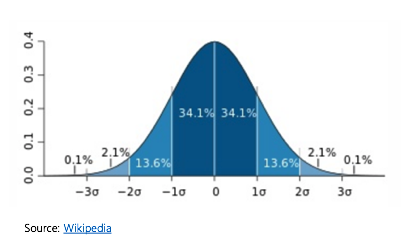


#### 3. IQR 방식
- 75 percentile + IQR * 1.5 이상이거나 25 percentile + IQR * 1.5 이하인 경우 극단치로 처리
- 정규분포 아닐 경우 robust한 편

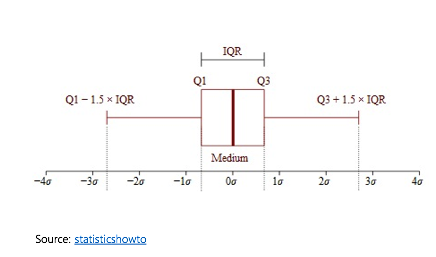

#### 4. 기타 방법
- Rule-based (ex, percentile 95% 이상이면 제거)
- Binning (연속변인을 카테고리형으로 변환)

#### 5. 발생이유
- 입력 오류, 측정 오류, 고의성, 처리시 에러, 샘플링에러, 자연발생 등
- 예방이 가장 좋음

In [40]:
# 이상치 처리 대상 데이터 (NA 제거한 dataframe)
df2.head()

,group,viewCount,editCount,shareCount,searchCount,coworkCount,add,del,move,rename,adddir,movedir,visdays,openCount,saveCount,exportCount,viewTraffic,editTraffic,exportTraffic,traffic
iduser,,,,,,,,,,,,,,,,,,,,
10100018739106,sdu,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,12.0,0.0,0.0,3504812.0,0.0,0.0,3504812.0
10100037810674,sdu,23.0,0.0,0.0,1.0,0.0,13.0,0.0,0.0,0.0,0.0,0.0,8.0,23.0,0.0,0.0,17123098.0,0.0,0.0,17123098.0
10100036273719,sdu,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,4.0,0.0,0.0,2234363.0,0.0,0.0,2234363.0
10100027752244,sdu,6.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,6.0,2.0,0.0,602361.0,210114.0,0.0,812475.0
10100006151000,sdu,33.0,0.0,0.0,0.0,0.0,16.0,0.0,0.0,0.0,0.0,0.0,18.0,33.0,0.0,0.0,4307703.0,0.0,0.0,4307703.0


In [41]:
# 숫자형 변수만 선택
# df3 = df2.drop("group", axis=1) 
df3 = df2._get_numeric_data() 

In [42]:
df3.describe()

,viewCount,editCount,shareCount,searchCount,coworkCount,add,del,move,rename,adddir,movedir,visdays,openCount,saveCount,exportCount,viewTraffic,editTraffic,exportTraffic,traffic
count,163352.000000,163352.000000,163352.000000,163352.000000,163352.000000,163352.000000,163352.00000,163352.00000,163352.00000,163352.000000,163352.000000,163352.000000,163352.000000,163352.000000,163352.000000,1.633520e+05,1.633520e+05,1.633520e+05,1.633520e+05
mean,24.794034,1.590394,0.075965,1.020955,0.003147,12.167767,0.00314,0.04704,0.41361,0.152536,0.002381,10.020043,22.205072,2.459572,0.007897,2.318484e+07,6.540148e+05,3.580391e+03,2.384243e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75%,30.000000,0.000000,0.000000,0.000000,0.000000,15.000000,0.00000,0.00000,0.00000,0.000000,0.000000,14.000000,27.000000,0.000000,0.000000,1.740115e+07,7.454000e+03,0.000000e+00,1.805862e+07
max,3005.000000,5267.000000,78.000000,893.000000,63.000000,17755.000000,28.00000,127.00000,8248.00000,355.000000,32.000000,31.000000,3005.000000,1432.000000,54.000000,2.826016e+10,1.233858e+09,1.199935e+08,2.826016e+10


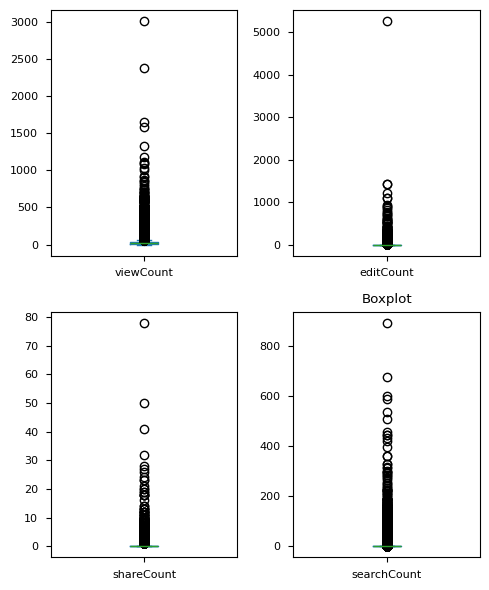

In [43]:
fig, ax = plt.subplots(2, 2)

df3['viewCount'].plot(kind='box', ax=ax[0, 0], figsize=(5, 6));
df3['editCount'].plot(kind='box', ax=ax[0, 1], figsize=(5, 6));
df3['shareCount'].plot(kind='box', ax=ax[1, 0], figsize=(5, 6));
df3['searchCount'].plot(kind='box', ax=ax[1, 1], figsize=(5, 6));

plt.title("Boxplot")
plt.tight_layout()

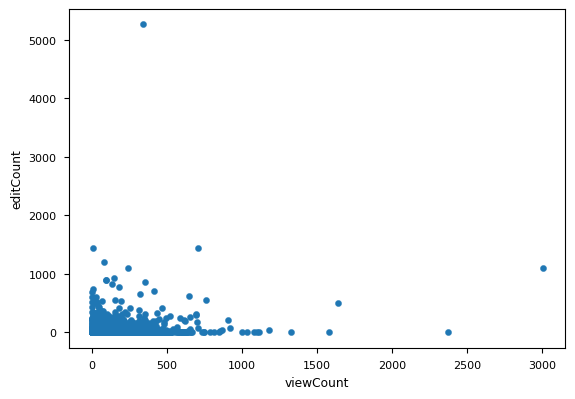

In [44]:
df3.plot(kind='scatter', x='viewCount', y='editCount');

In [45]:
# 표준편차 이용 (6-sigma): 각 컬럼별 표준편차에서 +- std 벗어난 경우 제외
def std_based_outlier(df):

    for i in range(0, len(df.iloc[1])): 
        df = df[~(np.abs(df.iloc[:,i] - df.iloc[:,i].mean()) > (3*df.iloc[:,i].std()))]

        return(df)

In [46]:
df3_std = std_based_outlier(df3)

In [47]:
df3_std.describe()

,viewCount,editCount,shareCount,searchCount,coworkCount,add,del,move,rename,adddir,movedir,visdays,openCount,saveCount,exportCount,viewTraffic,editTraffic,exportTraffic,traffic
count,160969.000000,160969.000000,160969.000000,160969.000000,160969.000000,160969.000000,160969.000000,160969.000000,160969.000000,160969.000000,160969.000000,160969.000000,160969.000000,160969.000000,160969.000000,1.609690e+05,1.609690e+05,1.609690e+05,1.609690e+05
mean,21.907144,1.246246,0.070809,0.830135,0.002025,11.041555,0.002584,0.034839,0.318148,0.144208,0.002218,9.818915,19.635452,1.913368,0.006181,2.114619e+07,5.685177e+05,2.388757e+03,2.171710e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75%,29.000000,0.000000,0.000000,0.000000,0.000000,14.000000,0.000000,0.000000,0.000000,0.000000,0.000000,13.000000,26.000000,0.000000,0.000000,1.675277e+07,1.410000e+02,0.000000e+00,1.732305e+07
max,135.000000,1436.000000,41.000000,293.000000,42.000000,17755.000000,27.000000,66.000000,7907.000000,355.000000,32.000000,31.000000,135.000000,1069.000000,51.000000,1.347645e+10,1.233858e+09,8.177168e+07,1.347645e+10


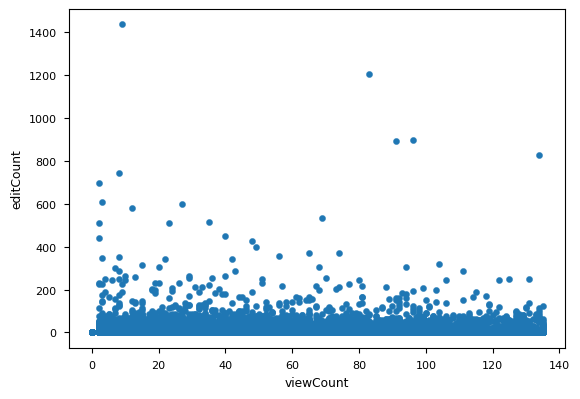

In [48]:
df3_std.plot(kind='scatter', x='viewCount', y='editCount');

In [49]:
## 가장 자주 쓰이는 방식
# z-score 이용: 표준점수로 변환후 +-3 std 벗어나는 경우 제거
from scipy import stats

df3_zscore = df3[(np.abs(stats.zscore(df3)) < 3).all(axis=1)]

In [50]:
df3_zscore.describe()

,viewCount,editCount,shareCount,searchCount,coworkCount,add,del,move,rename,adddir,movedir,visdays,openCount,saveCount,exportCount,viewTraffic,editTraffic,exportTraffic,traffic
count,154089.000000,154089.000000,154089.00000,154089.000000,154089.0,154089.000000,154089.0,154089.000000,154089.00000,154089.000000,154089.0,154089.000000,154089.000000,154089.000000,154089.0,1.540890e+05,1.540890e+05,154089.000000,1.540890e+05
mean,20.622458,0.570962,0.03352,0.320555,0.0,8.436618,0.0,0.005925,0.01884,0.073516,0.0,9.433756,18.373187,1.092888,0.0,1.643385e+07,2.852878e+05,1.504144,1.671913e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75%,27.000000,0.000000,0.00000,0.000000,0.0,14.000000,0.0,0.000000,0.00000,0.000000,0.0,13.000000,25.000000,0.000000,0.0,1.572663e+07,0.000000e+00,0.000000,1.618937e+07
max,135.000000,60.000000,1.00000,27.000000,0.0,336.000000,0.0,2.000000,115.00000,6.000000,0.0,30.000000,129.000000,52.000000,0.0,4.227817e+08,2.266368e+07,125497.000000,4.263385e+08


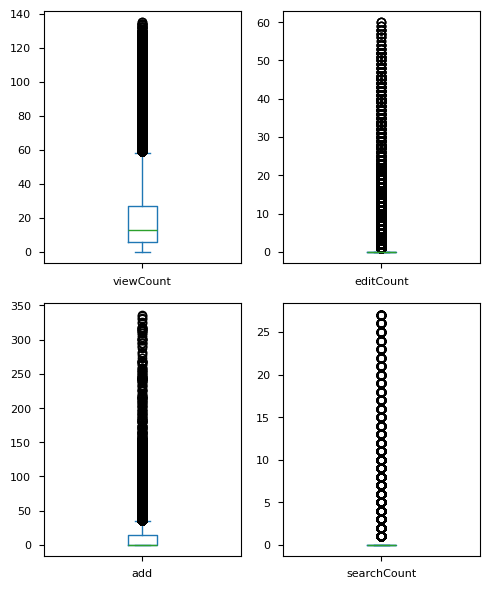

In [51]:
fig, ax = plt.subplots(2, 2)

df3_zscore['viewCount'].plot(kind='box', ax=ax[0, 0], figsize=(5, 6));
df3_zscore['editCount'].plot(kind='box', ax=ax[0, 1], figsize=(5, 6));
df3_zscore['add'].plot(kind='box', ax=ax[1, 0], figsize=(5, 6));
df3_zscore['searchCount'].plot(kind='box', ax=ax[1, 1], figsize=(5, 6));

plt.tight_layout()

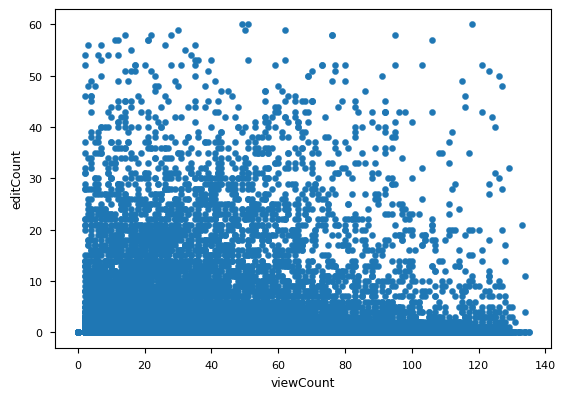

In [52]:
df3_zscore.plot(kind='scatter', x='viewCount', y='editCount');

**original std vs z-score std**
- 원 데이터로 처리시 매우 보수적인 결과 -> 효과가 낮아서 자주 쓰이지 않음
- 일반적으로 z-score 자주 활용, 단 정규분포에 효과적
- 정규분포가 아닐 경우, IQR 고려

In [53]:
# IQR
df3 = df2._get_numeric_data() 

for i in range(0, len(df3.iloc[1])): 
        
    q1 = df3.iloc[:,i].quantile(0.25)
    q3 = df3.iloc[:,i].quantile(0.75)
    iqr = q3-q1
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr       

    df3 = df3[(df3.iloc[:,i] >= fence_low) & (df3.iloc[:,i] <= fence_high)]

In [54]:
df3.describe()

,viewCount,editCount,shareCount,searchCount,coworkCount,add,del,move,rename,adddir,movedir,visdays,openCount,saveCount,exportCount,viewTraffic,editTraffic,exportTraffic,traffic
count,76304.000000,76304.0,76304.0,76304.0,76304.0,76304.000000,76304.0,76304.0,76304.0,76304.0,76304.0,76304.000000,76304.000000,76304.0,76304.0,7.630400e+04,76304.0,76304.0,7.630400e+04
mean,10.810914,0.0,0.0,0.0,0.0,2.978717,0.0,0.0,0.0,0.0,0.0,6.641303,8.549211,0.0,0.0,3.447417e+06,0.0,0.0,3.447417e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75%,15.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,9.000000,12.000000,0.0,0.0,5.372809e+06,0.0,0.0,5.372809e+06
max,66.000000,0.0,0.0,0.0,0.0,30.000000,0.0,0.0,0.0,0.0,0.0,19.000000,39.000000,0.0,0.0,1.688229e+07,0.0,0.0,1.688229e+07


#### 6. 최종 검토
- IQR: 분포가 쏠려 있어서 (거의 median이 0), 조금만 벗어나도 이상치로 판정
- 최종 선정은 zscore 기준으로 우선 선택!!

In [55]:
df3_zscore.describe()

,viewCount,editCount,shareCount,searchCount,coworkCount,add,del,move,rename,adddir,movedir,visdays,openCount,saveCount,exportCount,viewTraffic,editTraffic,exportTraffic,traffic
count,154089.000000,154089.000000,154089.00000,154089.000000,154089.0,154089.000000,154089.0,154089.000000,154089.00000,154089.000000,154089.0,154089.000000,154089.000000,154089.000000,154089.0,1.540890e+05,1.540890e+05,154089.000000,1.540890e+05
mean,20.622458,0.570962,0.03352,0.320555,0.0,8.436618,0.0,0.005925,0.01884,0.073516,0.0,9.433756,18.373187,1.092888,0.0,1.643385e+07,2.852878e+05,1.504144,1.671913e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75%,27.000000,0.000000,0.00000,0.000000,0.0,14.000000,0.0,0.000000,0.00000,0.000000,0.0,13.000000,25.000000,0.000000,0.0,1.572663e+07,0.000000e+00,0.000000,1.618937e+07
max,135.000000,60.000000,1.00000,27.000000,0.0,336.000000,0.0,2.000000,115.00000,6.000000,0.0,30.000000,129.000000,52.000000,0.0,4.227817e+08,2.266368e+07,125497.000000,4.263385e+08


In [56]:
# max가 0인 컬럼은 제거
cols_max = df3_zscore.describe().loc['max']
drop_cols = cols_max[cols_max == 0]

df3_zscore.drop(drop_cols.index, axis=1, inplace=True)

In [57]:
df3_zscore.describe()

,viewCount,editCount,shareCount,searchCount,add,move,rename,adddir,visdays,openCount,saveCount,viewTraffic,editTraffic,exportTraffic,traffic
count,154089.000000,154089.000000,154089.00000,154089.000000,154089.000000,154089.000000,154089.00000,154089.000000,154089.000000,154089.000000,154089.000000,1.540890e+05,1.540890e+05,154089.000000,1.540890e+05
mean,20.622458,0.570962,0.03352,0.320555,8.436618,0.005925,0.01884,0.073516,9.433756,18.373187,1.092888,1.643385e+07,2.852878e+05,1.504144,1.671913e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75%,27.000000,0.000000,0.00000,0.000000,14.000000,0.000000,0.00000,0.000000,13.000000,25.000000,0.000000,1.572663e+07,0.000000e+00,0.000000,1.618937e+07
max,135.000000,60.000000,1.00000,27.000000,336.000000,2.000000,115.00000,6.000000,30.000000,129.000000,52.000000,4.227817e+08,2.266368e+07,125497.000000,4.263385e+08


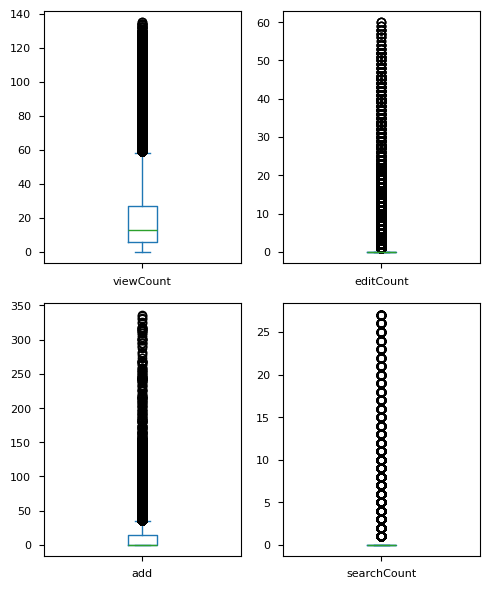

In [58]:
fig, ax = plt.subplots(2, 2)

df3_zscore['viewCount'].plot(kind='box', ax=ax[0, 0], figsize=(5, 6));
df3_zscore['editCount'].plot(kind='box', ax=ax[0, 1], figsize=(5, 6));
df3_zscore['add'].plot(kind='box', ax=ax[1, 0], figsize=(5, 6));
df3_zscore['searchCount'].plot(kind='box', ax=ax[1, 1], figsize=(5, 6));

plt.tight_layout()

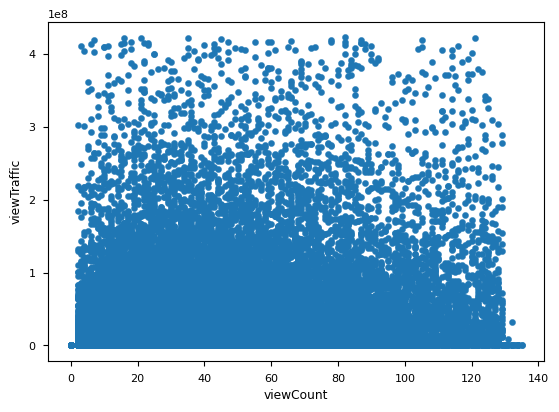

In [59]:
df3_zscore.plot(kind='scatter', x='viewCount', y='viewTraffic');

### 분포 변환
- Transformation
    - if right skewed: Log, Sqrt, cube root functions
    - if left skwed: square
- left_distribution: X^3
- mild_left: X^2
- mild_right: sqrt(X)
- right: ln(X)
- servere right: 1/X    
    
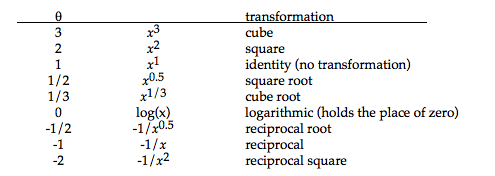

- source: http://seismo.berkeley.edu/~kirchner/eps_120/Toolkits/Toolkit_03.pdf

- Reference
    - http://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing
    - http://scikit-learn.org/stable/modules/preprocessing.html

In [60]:
df4 = df3_zscore.copy()

In [61]:
df4.head()

,viewCount,editCount,shareCount,searchCount,add,move,rename,adddir,visdays,openCount,saveCount,viewTraffic,editTraffic,exportTraffic,traffic
iduser,,,,,,,,,,,,,,,
10100018739106,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,12.0,0.0,3504812.0,0.0,0.0,3504812.0
10100037810674,23.0,0.0,0.0,1.0,13.0,0.0,0.0,0.0,8.0,23.0,0.0,17123098.0,0.0,0.0,17123098.0
10100036273719,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,4.0,0.0,2234363.0,0.0,0.0,2234363.0
10100027752244,6.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,5.0,6.0,2.0,602361.0,210114.0,0.0,812475.0
10100006151000,33.0,0.0,0.0,0.0,16.0,0.0,0.0,0.0,18.0,33.0,0.0,4307703.0,0.0,0.0,4307703.0


In [62]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Index: 154089 entries, 10100018739106 to 10100021804275
Data columns (total 15 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   viewCount      154089 non-null  float64
 1   editCount      154089 non-null  float64
 2   shareCount     154089 non-null  float64
 3   searchCount    154089 non-null  float64
 4   add            154089 non-null  float64
 5   move           154089 non-null  float64
 6   rename         154089 non-null  float64
 7   adddir         154089 non-null  float64
 8   visdays        154089 non-null  float64
 9   openCount      154089 non-null  float64
 10  saveCount      154089 non-null  float64
 11  viewTraffic    154089 non-null  float64
 12  editTraffic    154089 non-null  float64
 13  exportTraffic  154089 non-null  float64
 14  traffic        154089 non-null  float64
dtypes: float64(15)
memory usage: 18.8 MB


In [63]:
# 분포를 간단히 확인 with IQR, MIN, MAX, MEAN, STD
df4.describe()

,viewCount,editCount,shareCount,searchCount,add,move,rename,adddir,visdays,openCount,saveCount,viewTraffic,editTraffic,exportTraffic,traffic
count,154089.000000,154089.000000,154089.00000,154089.000000,154089.000000,154089.000000,154089.00000,154089.000000,154089.000000,154089.000000,154089.000000,1.540890e+05,1.540890e+05,154089.000000,1.540890e+05
mean,20.622458,0.570962,0.03352,0.320555,8.436618,0.005925,0.01884,0.073516,9.433756,18.373187,1.092888,1.643385e+07,2.852878e+05,1.504144,1.671913e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75%,27.000000,0.000000,0.00000,0.000000,14.000000,0.000000,0.00000,0.000000,13.000000,25.000000,0.000000,1.572663e+07,0.000000e+00,0.000000,1.618937e+07
max,135.000000,60.000000,1.00000,27.000000,336.000000,2.000000,115.00000,6.000000,30.000000,129.000000,52.000000,4.227817e+08,2.266368e+07,125497.000000,4.263385e+08


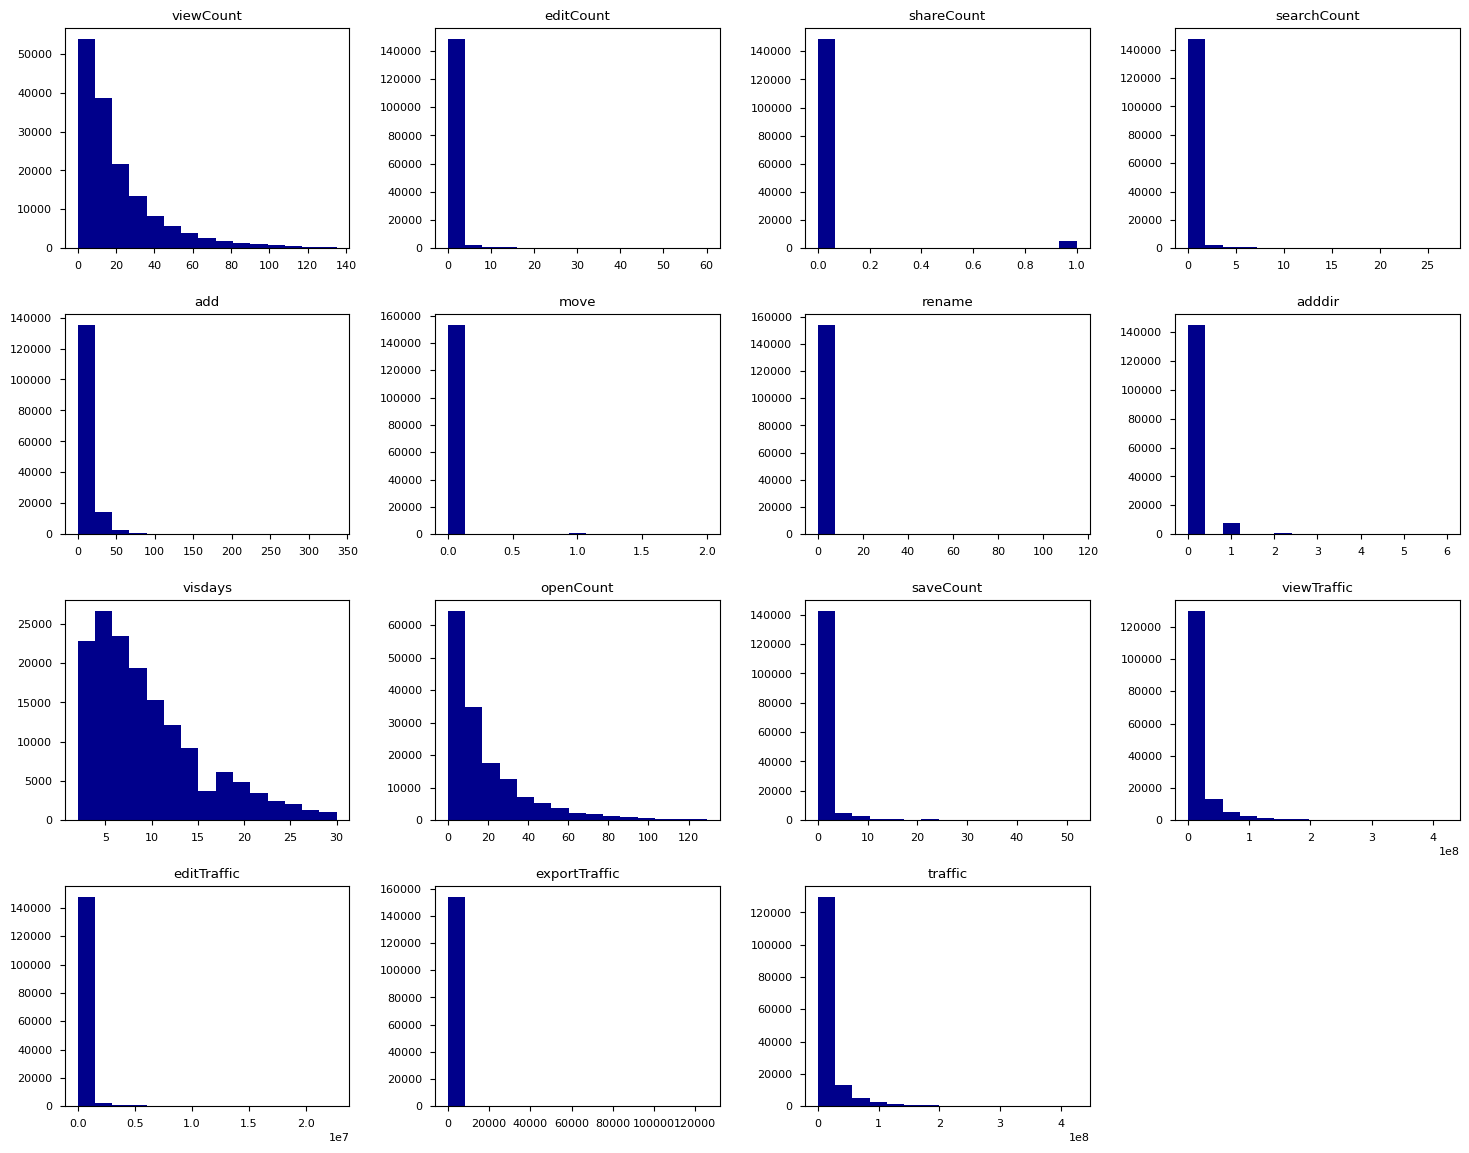

In [64]:
# Outlier 미처리시 skewness 더 심해짐
df4.hist(bins=15, color='darkblue', figsize=(18,14), grid=False); 

plt.grid(False)

In [65]:
# log 함수 적용 (if right skewed)
df4_log = df4.apply(lambda x: np.log(x+1))    

df4_log.describe()

,viewCount,editCount,shareCount,searchCount,add,move,rename,adddir,visdays,openCount,saveCount,viewTraffic,editTraffic,exportTraffic,traffic
count,154089.000000,154089.000000,154089.000000,154089.000000,154089.000000,154089.000000,154089.00000,154089.000000,154089.000000,154089.000000,154089.000000,154089.000000,154089.000000,154089.000000,154089.000000
mean,2.654437,0.145222,0.023234,0.092078,1.110463,0.003773,0.00649,0.046014,2.178073,2.378232,0.299840,13.523641,2.759002,0.000151,13.595933
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75%,3.332205,0.000000,0.000000,0.000000,2.708050,0.000000,0.00000,0.000000,2.639057,3.258097,0.000000,16.570866,0.000000,0.000000,16.599865
max,4.912655,4.110874,0.693147,3.332205,5.820083,1.098612,4.75359,1.945910,3.433987,4.867534,3.970292,19.862367,16.936274,11.740045,19.870744


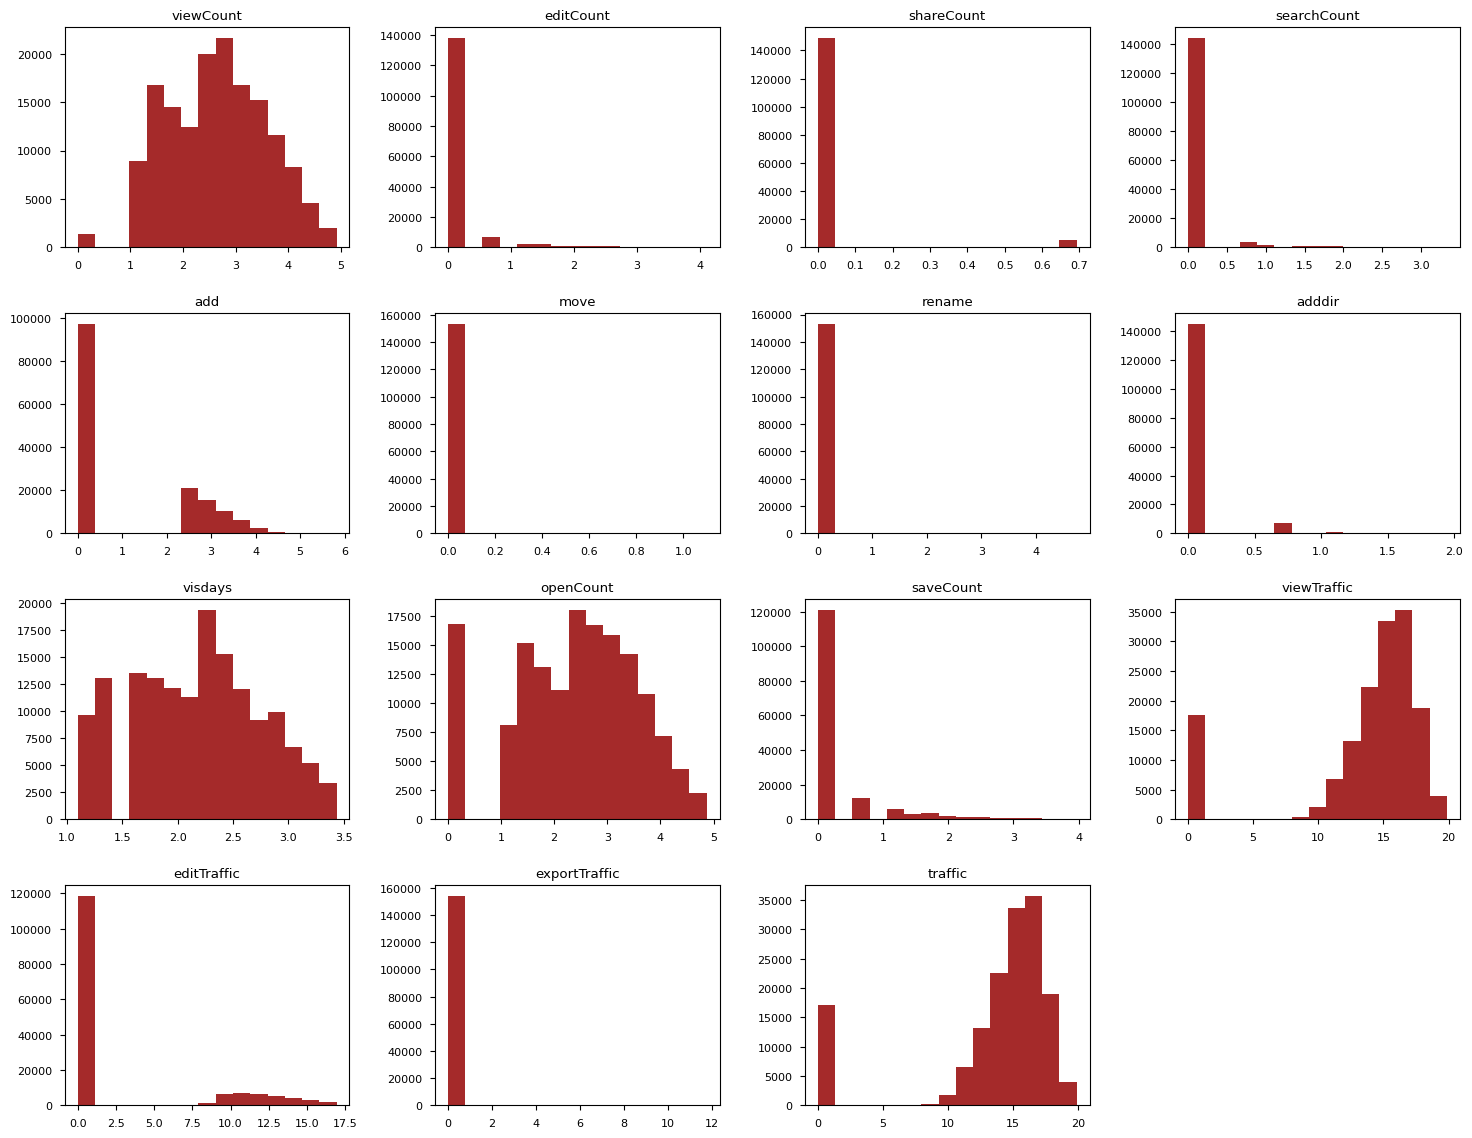

In [66]:
df4_log.hist(bins=15, color='brown', figsize=(18,14), grid=False);

In [67]:
# 다른 함수 적용
df4_cube_root = df4.apply(lambda x: x ** (1. / 3))    

df4_cube_root.describe()

,viewCount,editCount,shareCount,searchCount,add,move,rename,adddir,visdays,openCount,saveCount,viewTraffic,editTraffic,exportTraffic,traffic
count,154089.000000,154089.000000,154089.00000,154089.000000,154089.000000,154089.000000,154089.000000,154089.000000,154089.000000,154089.000000,154089.000000,154089.000000,154089.000000,154089.000000,154089.000000
mean,2.463932,0.154521,0.03352,0.096476,1.004263,0.005065,0.007473,0.062151,2.016972,2.207634,0.318558,176.021729,16.150157,0.000632,177.996762
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75%,3.000000,0.000000,0.00000,0.000000,2.410142,0.000000,0.000000,0.000000,2.351335,2.924018,0.000000,250.540877,0.000000,0.000000,252.974444
max,5.129928,3.914868,1.00000,3.000000,6.952053,1.259921,4.862944,1.817121,3.107233,5.052774,3.732511,750.536913,282.993719,50.066179,752.635734


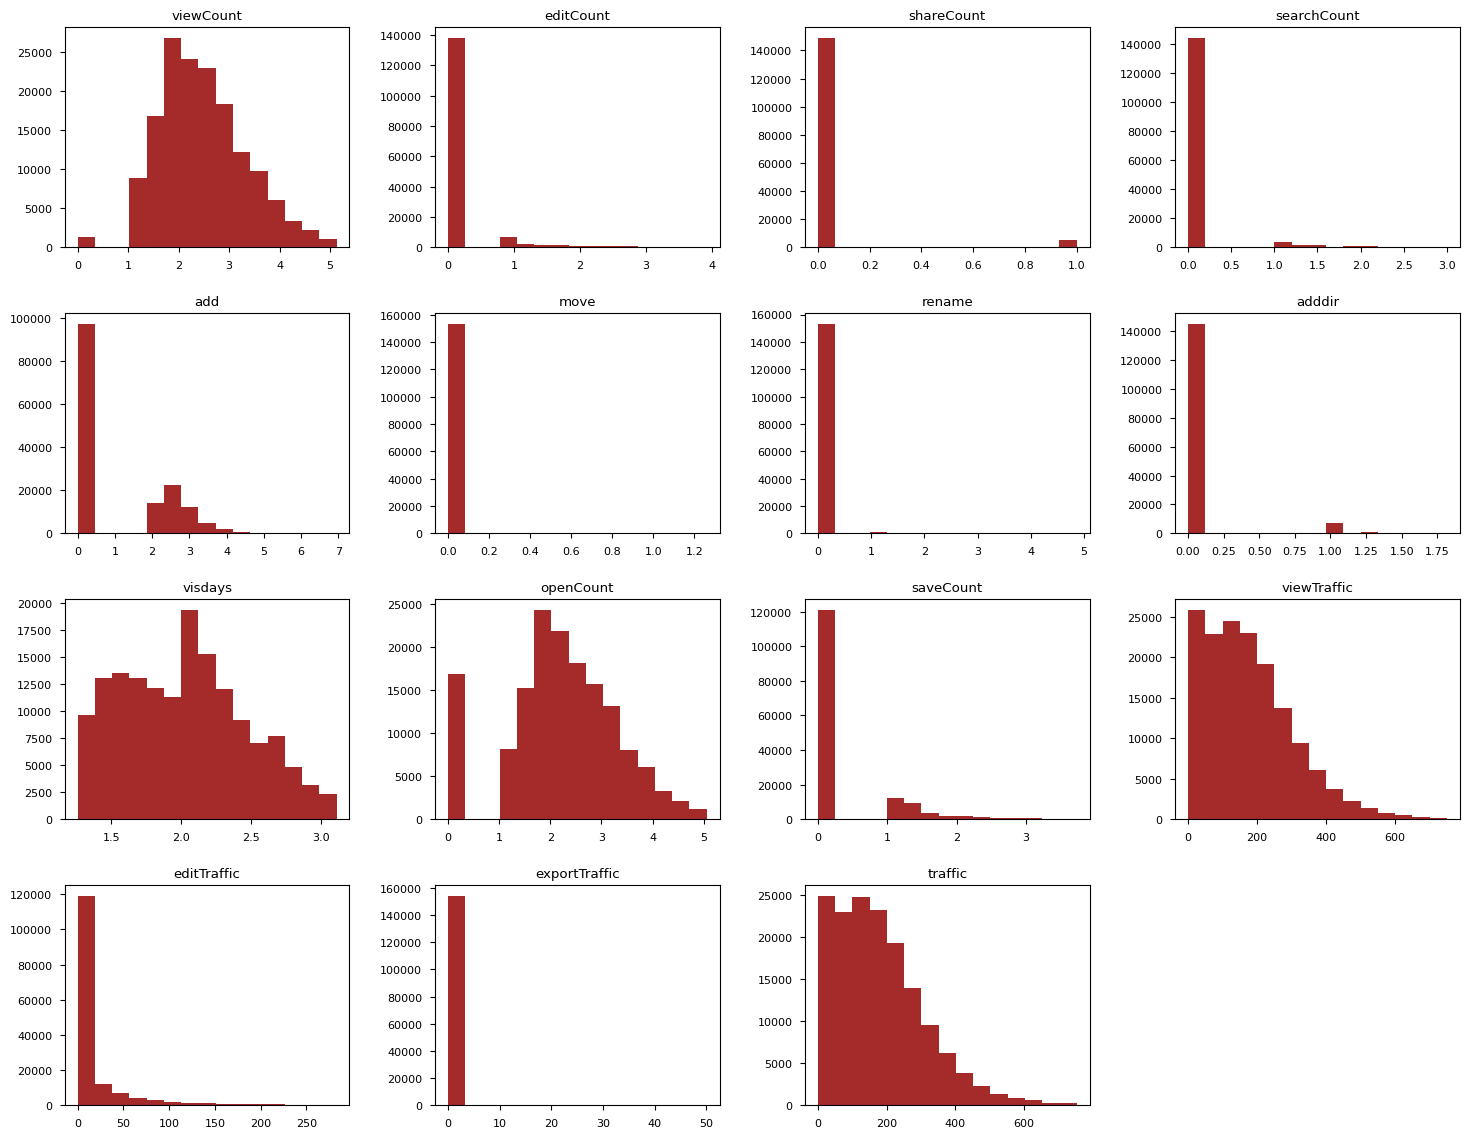

In [68]:
df4_cube_root.hist(bins=15, color='brown', figsize=(18,14), grid=False);

**Q) 다양한 여러 함수를 적용해보시고 가장 정규분포로 잘 변환되는 함수를 찾아주세요.**

In [69]:
# 다른 함수 적용 실습

**우선 분포 변환은 Pass**
- 원 분포대로 모델링 구축하고 추후 개선시 transform 진행

#### 단위 표준화 (Scaling)
- 모든 변수의 단위를 동일한 기준(스케일)로 통일
    - 이번 사례의 경우 tarffic(byte) 변수로 인해, 필수적인 과정
- Standard Scaler (Mean: 0, std: 1)
- MinMax Scaler (default: min=0, max=1)
- Robust Scaler (x - q1 / q3-q1)
- Source: http://benalexkeen.com/feature-scaling-with-scikit-learn/

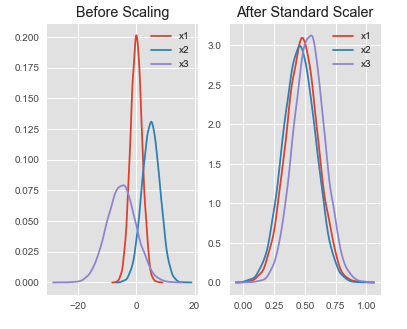
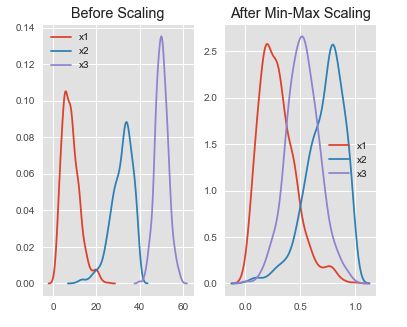
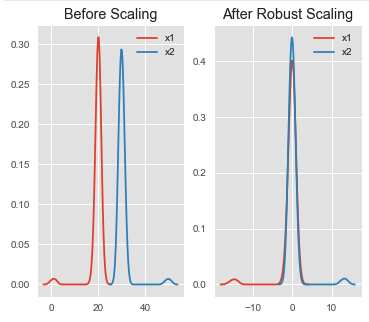

In [70]:
df4_std_scale = df4.copy() # after removes outliers

In [71]:
df4_std_scale.head()

,viewCount,editCount,shareCount,searchCount,add,move,rename,adddir,visdays,openCount,saveCount,viewTraffic,editTraffic,exportTraffic,traffic
iduser,,,,,,,,,,,,,,,
10100018739106,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,12.0,0.0,3504812.0,0.0,0.0,3504812.0
10100037810674,23.0,0.0,0.0,1.0,13.0,0.0,0.0,0.0,8.0,23.0,0.0,17123098.0,0.0,0.0,17123098.0
10100036273719,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,4.0,0.0,2234363.0,0.0,0.0,2234363.0
10100027752244,6.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,5.0,6.0,2.0,602361.0,210114.0,0.0,812475.0
10100006151000,33.0,0.0,0.0,0.0,16.0,0.0,0.0,0.0,18.0,33.0,0.0,4307703.0,0.0,0.0,4307703.0


In [72]:
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

for c in df4_std_scale:
    df4_std_scale[c] = StandardScaler().fit_transform(np.array(df4_std_scale[c]).reshape(-1, 1)).round(4)

In [73]:
df4_std_scale.describe().round(2)

,viewCount,editCount,shareCount,searchCount,add,move,rename,adddir,visdays,openCount,saveCount,viewTraffic,editTraffic,exportTraffic,traffic
count,154089.00,154089.00,154089.00,154089.00,154089.00,154089.00,154089.00,154089.00,154089.00,154089.00,154089.00,154089.00,154089.00,154089.00,154089.00
mean,-0.00,0.00,0.00,0.00,-0.00,-0.00,-0.00,0.00,0.00,0.00,0.00,-0.00,0.00,-0.00,-0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75%,0.30,-0.18,-0.19,-0.17,0.35,-0.07,-0.03,-0.22,0.58,0.32,-0.27,-0.02,-0.19,-0.00,-0.01
max,5.37,18.61,5.37,13.79,20.33,22.00,168.91,17.67,3.36,5.28,12.47,11.35,14.58,299.56,11.36


**Q) 단위 변화후 분포에는 어떠한 변화가 있을까요?**

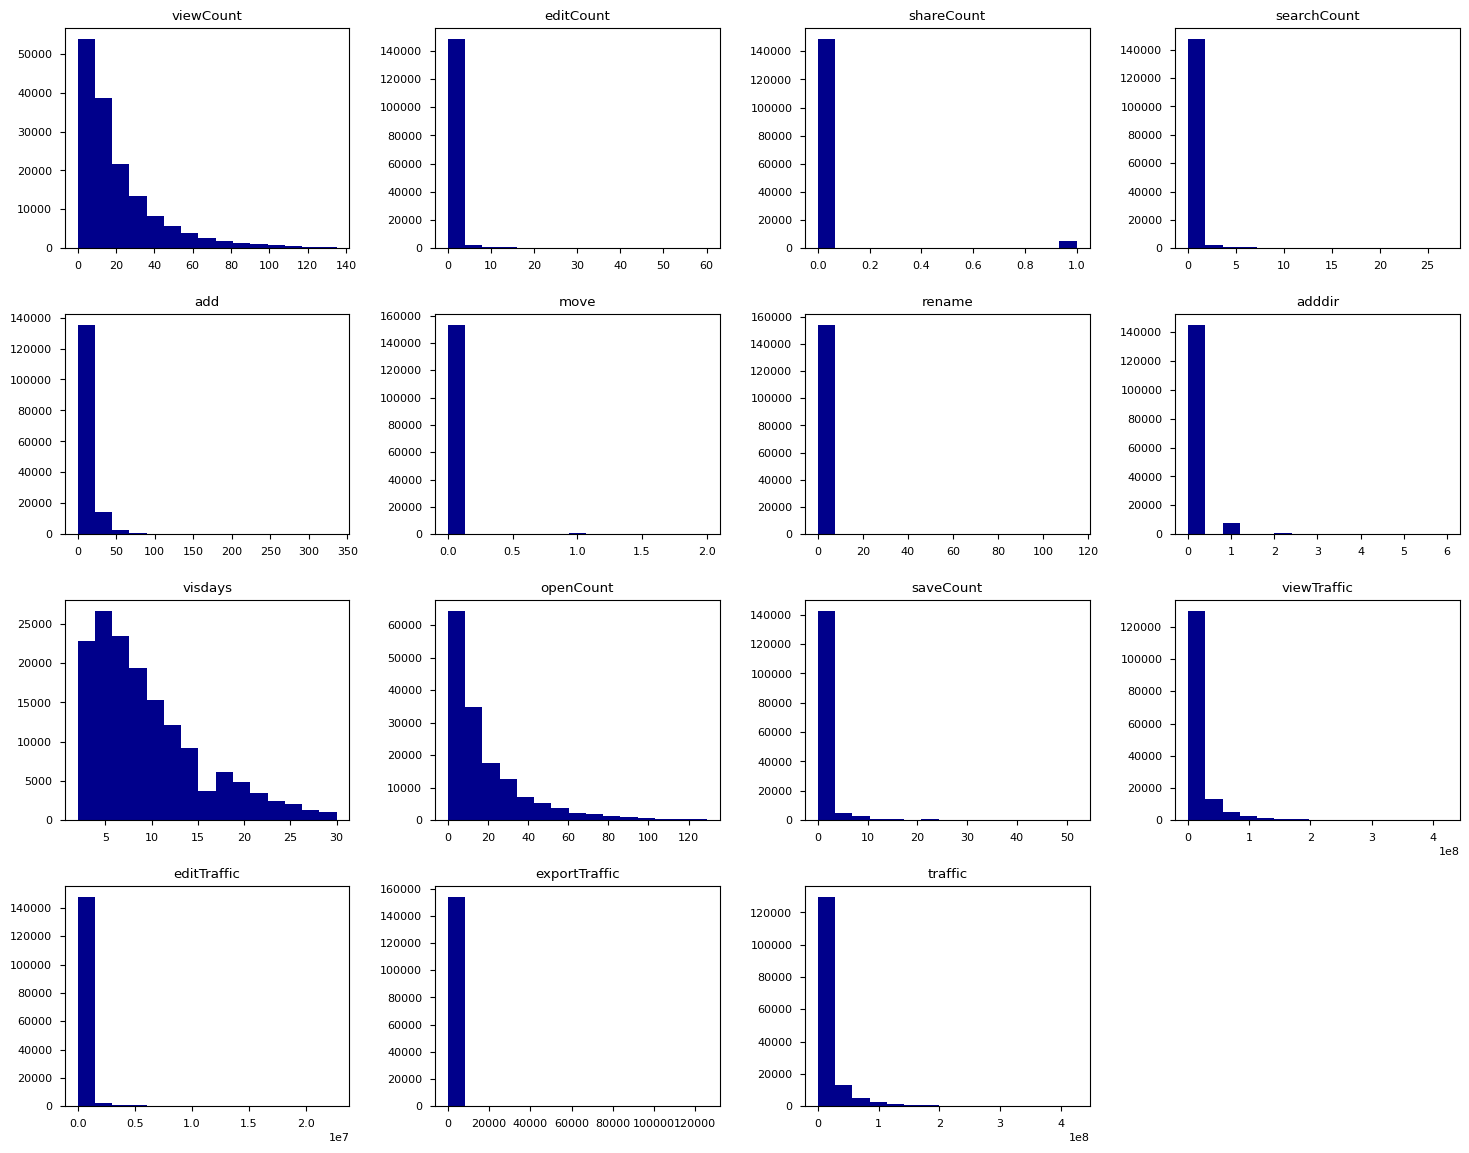

In [74]:
df4.hist(bins=15, color='darkblue', figsize=(18,14), grid=False);

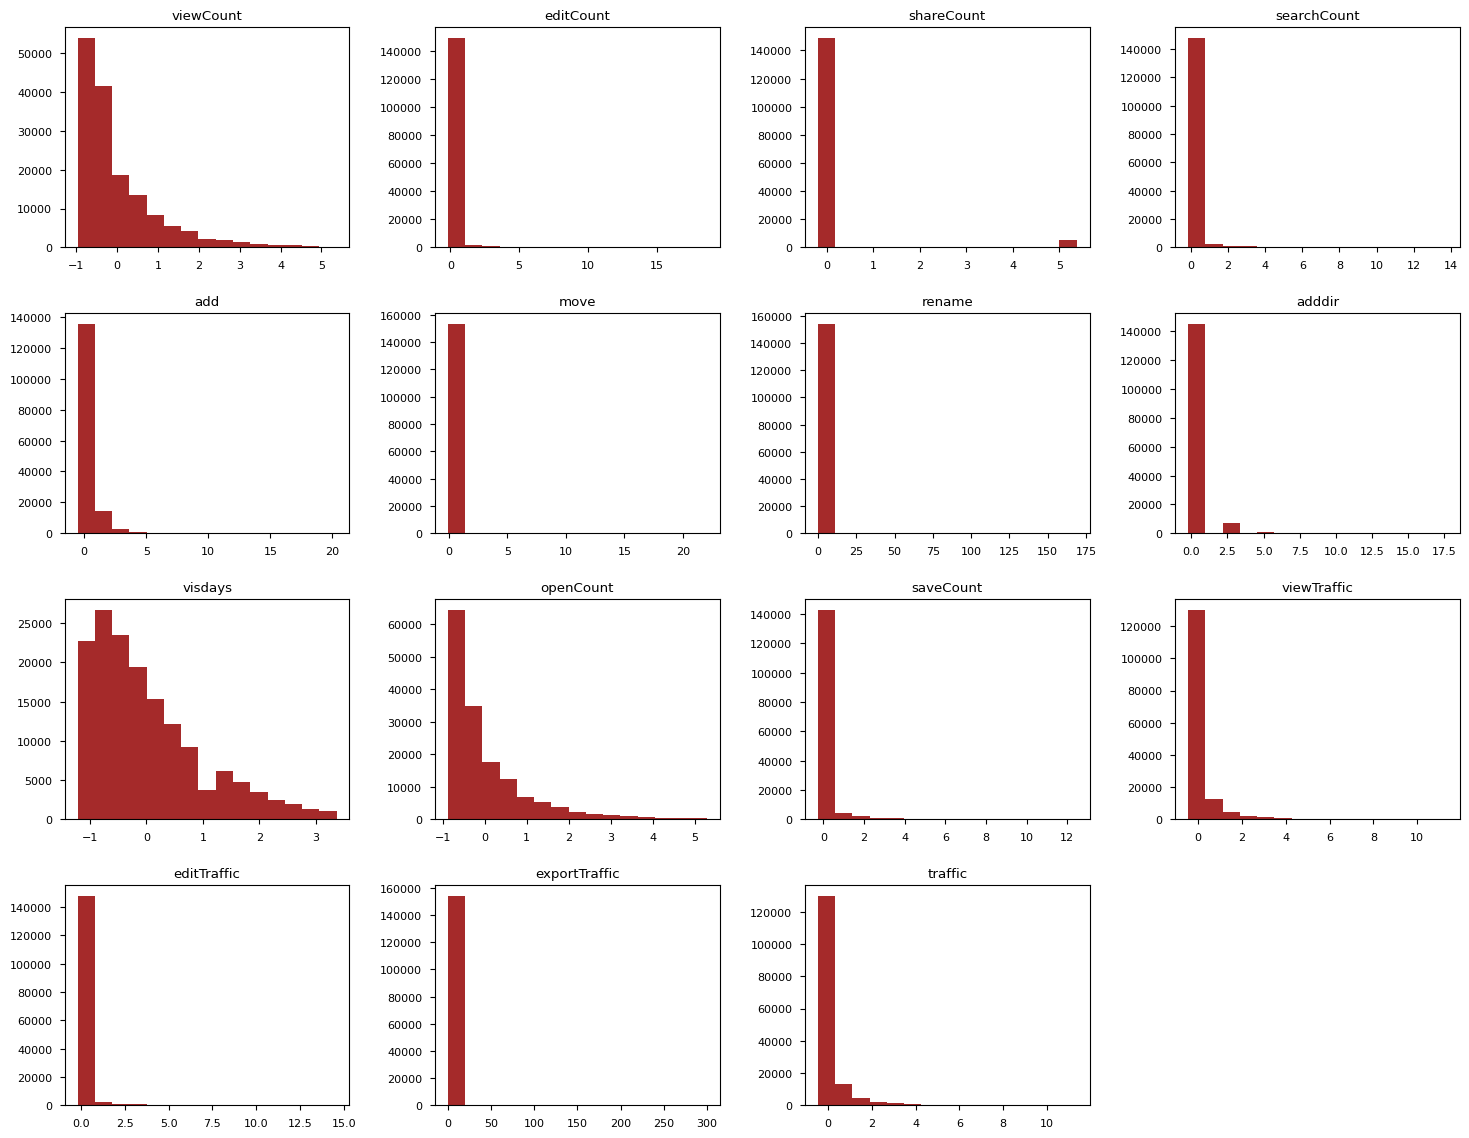

In [75]:
df4_std_scale.hist(bins=15, color='brown', figsize=(18,14), grid=False);

In [76]:
df4_minmax_scale = df4.copy()

In [77]:
from sklearn.preprocessing import MinMaxScaler

for c in df4_minmax_scale:
    df4_minmax_scale[c] = MinMaxScaler().fit_transform(np.array(df4_minmax_scale[c]).reshape(-1,1).round(4))

In [78]:
df4_minmax_scale.describe()

,viewCount,editCount,shareCount,searchCount,add,move,rename,adddir,visdays,openCount,saveCount,viewTraffic,editTraffic,exportTraffic,traffic
count,154089.000000,154089.000000,154089.00000,154089.000000,154089.000000,154089.000000,154089.000000,154089.000000,154089.000000,154089.000000,154089.000000,154089.000000,154089.000000,154089.000000,154089.000000
mean,0.152759,0.009516,0.03352,0.011872,0.025109,0.002963,0.000164,0.012253,0.265491,0.142428,0.021017,0.038871,0.012588,0.000012,0.039216
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75%,0.200000,0.000000,0.00000,0.000000,0.041667,0.000000,0.000000,0.000000,0.392857,0.193798,0.000000,0.037198,0.000000,0.000000,0.037973
max,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [79]:
df4_robust_scale = df4.copy()

In [80]:
from sklearn.preprocessing import RobustScaler

for c in df4_robust_scale:
    df4_robust_scale[c] = RobustScaler().fit_transform(np.array(df4_robust_scale[c]).reshape(-1,1).round(4))

In [81]:
df4_robust_scale.describe()

,viewCount,editCount,shareCount,searchCount,add,move,rename,adddir,visdays,openCount,saveCount,viewTraffic,editTraffic,exportTraffic,traffic
count,154089.000000,154089.000000,154089.00000,154089.000000,154089.000000,154089.000000,154089.00000,154089.000000,154089.000000,154089.000000,154089.000000,154089.000000,1.540890e+05,154089.000000,154089.000000
mean,0.362974,0.570962,0.03352,0.320555,0.602616,0.005925,0.01884,0.073516,0.179219,0.351104,1.092888,0.821304,2.852878e+05,1.504144,0.808396
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75%,0.666667,0.000000,0.00000,0.000000,1.000000,0.000000,0.00000,0.000000,0.625000,0.666667,0.000000,0.774883,0.000000e+00,0.000000,0.774552
max,5.809524,60.000000,1.00000,27.000000,24.000000,2.000000,115.00000,6.000000,2.750000,5.619048,52.000000,27.493615,2.266368e+07,125497.000000,26.976544


In [82]:
# dataset after removes outliers, not transform, no scale
df4.head()

,viewCount,editCount,shareCount,searchCount,add,move,rename,adddir,visdays,openCount,saveCount,viewTraffic,editTraffic,exportTraffic,traffic
iduser,,,,,,,,,,,,,,,
10100018739106,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,12.0,0.0,3504812.0,0.0,0.0,3504812.0
10100037810674,23.0,0.0,0.0,1.0,13.0,0.0,0.0,0.0,8.0,23.0,0.0,17123098.0,0.0,0.0,17123098.0
10100036273719,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,4.0,0.0,2234363.0,0.0,0.0,2234363.0
10100027752244,6.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,5.0,6.0,2.0,602361.0,210114.0,0.0,812475.0
10100006151000,33.0,0.0,0.0,0.0,16.0,0.0,0.0,0.0,18.0,33.0,0.0,4307703.0,0.0,0.0,4307703.0


In [83]:
df5 = df4.join(df2['group'])

In [84]:
df5.head()

,viewCount,editCount,shareCount,searchCount,add,move,rename,adddir,visdays,openCount,saveCount,viewTraffic,editTraffic,exportTraffic,traffic,group
iduser,,,,,,,,,,,,,,,,
10100018739106,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,12.0,0.0,3504812.0,0.0,0.0,3504812.0,sdu
10100037810674,23.0,0.0,0.0,1.0,13.0,0.0,0.0,0.0,8.0,23.0,0.0,17123098.0,0.0,0.0,17123098.0,sdu
10100036273719,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,4.0,0.0,2234363.0,0.0,0.0,2234363.0,sdu
10100027752244,6.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,5.0,6.0,2.0,602361.0,210114.0,0.0,812475.0,sdu
10100006151000,33.0,0.0,0.0,0.0,16.0,0.0,0.0,0.0,18.0,33.0,0.0,4307703.0,0.0,0.0,4307703.0,sdu


In [85]:
df5.describe() 

,viewCount,editCount,shareCount,searchCount,add,move,rename,adddir,visdays,openCount,saveCount,viewTraffic,editTraffic,exportTraffic,traffic
count,154089.000000,154089.000000,154089.00000,154089.000000,154089.000000,154089.000000,154089.00000,154089.000000,154089.000000,154089.000000,154089.000000,1.540890e+05,1.540890e+05,154089.000000,1.540890e+05
mean,20.622458,0.570962,0.03352,0.320555,8.436618,0.005925,0.01884,0.073516,9.433756,18.373187,1.092888,1.643385e+07,2.852878e+05,1.504144,1.671913e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75%,27.000000,0.000000,0.00000,0.000000,14.000000,0.000000,0.00000,0.000000,13.000000,25.000000,0.000000,1.572663e+07,0.000000e+00,0.000000,1.618937e+07
max,135.000000,60.000000,1.00000,27.000000,336.000000,2.000000,115.00000,6.000000,30.000000,129.000000,52.000000,4.227817e+08,2.266368e+07,125497.000000,4.263385e+08


####  [Multicollinearity](https://ko.wikipedia.org/wiki/%EB%8B%A4%EC%A4%91%EA%B3%B5%EC%84%A0%EC%84%B1)
- 변수 삭제 1): EX) editTraffic, exportTraffic, viewTraffic, openCount
- 변수 삭제 2): 분포가 정상이 아닌 경우 (우선 유지)
- 변수 축소 EX) PCA, Factor Analysis, etc

ValueError: could not convert string to float: 'sdu'

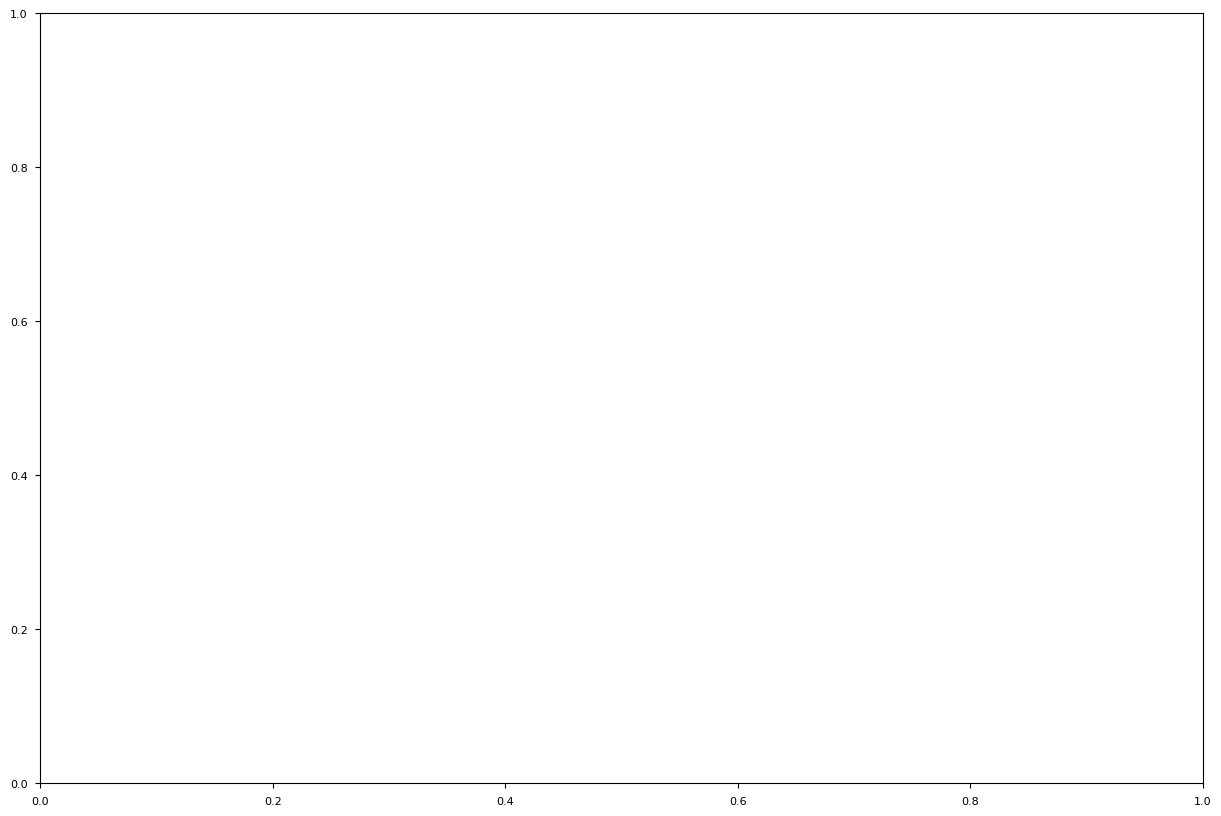

In [86]:
fig, ax = plt.subplots(figsize=(15,10))

sns.heatmap(df5.corr(), annot=True, annot_kws={"size": 13}, cmap='Purples');

In [87]:
# 상관관계 높은 변수 제거
drop_cols = ['editTraffic', 'exportTraffic', 'viewTraffic', 'openCount']

In [88]:
df5.drop(drop_cols, axis=1, inplace=True)

In [89]:
df5.head()

,viewCount,editCount,shareCount,searchCount,add,move,rename,adddir,visdays,saveCount,traffic,group
iduser,,,,,,,,,,,,
10100018739106,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,3504812.0,sdu
10100037810674,23.0,0.0,0.0,1.0,13.0,0.0,0.0,0.0,8.0,0.0,17123098.0,sdu
10100036273719,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,2234363.0,sdu
10100027752244,6.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,5.0,2.0,812475.0,sdu
10100006151000,33.0,0.0,0.0,0.0,16.0,0.0,0.0,0.0,18.0,0.0,4307703.0,sdu


#### Imbalance Issues
- 결제자 여부에 대한 데이터 사례가 불충분 => 모델이 sdu 로 대부분 예측하는 결과
    - SDU(0)를 SDU(0)로 예측하는 정확도(True Negative)는 높을 수있으나, MDU(1)를 MDU(1) 예측하는 TP는 낮을 것으로 예상
- how to handle imbalance    
    - https://machinelearningmastery.com/tactics-to-combat-imbalanced-classes-in-your-machine-learning-dataset/

In [90]:
df5.group.value_counts().transform(lambda x: x / x.sum())

group
sdu    0.966818
mdu    0.033182
Name: count, dtype: float64

<Axes: xlabel='group'>

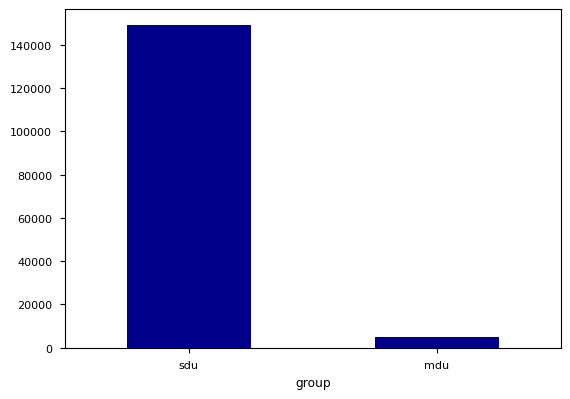

In [91]:
df5.group.value_counts().plot(kind='bar', color='darkblue', rot=0)

In [92]:
df5['group'] = np.where(df5['group'] == 'sdu', 0, 1) 

In [93]:
df5.head()

,viewCount,editCount,shareCount,searchCount,add,move,rename,adddir,visdays,saveCount,traffic,group
iduser,,,,,,,,,,,,
10100018739106,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,3504812.0,0
10100037810674,23.0,0.0,0.0,1.0,13.0,0.0,0.0,0.0,8.0,0.0,17123098.0,0
10100036273719,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,2234363.0,0
10100027752244,6.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,5.0,2.0,812475.0,0
10100006151000,33.0,0.0,0.0,0.0,16.0,0.0,0.0,0.0,18.0,0.0,4307703.0,0


### 파일 저장

In [94]:
df5.to_csv("data/testset3.csv")